# Data Loading

I have uploaded a zip file of cats and dogs dataset in my Google Drive, I will mount google drive in colab, import that dataset and unzip it which will store it in my colab instance.

In [18]:
import random
import numpy as np
import matplotlib as plt
import tensorflow as tf

In [19]:
from google.colab import drive

In [20]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
!unzip gdrive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

There are two directories for training and testing dataset so we will walk through these directories and see how many images of cats and dogs do we have in each our our directories.

In [22]:
import os

num_cat_images_train = len(os.listdir("training_set/training_set/cats"))
num_dog_images_train = len(os.listdir("training_set/training_set/dogs"))
num_cat_images_test = len(os.listdir("test_set/test_set/cats"))
num_dog_images_test = len(os.listdir("test_set/test_set/dogs"))

In [23]:
print(f"Training dataset has {num_cat_images_train} cat images and {num_dog_images_train} dog images.")
print(f"Test dataset has {num_cat_images_test} cat images and {num_dog_images_test} dog images.")

Training dataset has 4001 cat images and 4006 dog images.
Test dataset has 1012 cat images and 1013 dog images.


In [24]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)

class_names = [ item for item in os.listdir('test_set/test_set') if os.path.isdir(os.path.join("test_set/test_set", item)) ]
print(class_names)

['cats', 'dogs']


# Visualization

In [25]:
# Function to view an image randomly from any folder and class
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}") # show the shape of the image

Image shape: (375, 499, 3)


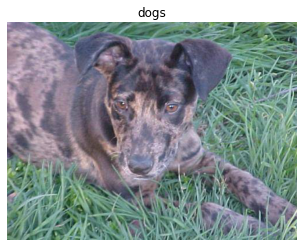

In [26]:
view_random_image("training_set/training_set/", "dogs")

# Data Preprocessing

As we all know that models need numerical data so we need to convert images into tensors/arrays/matrices.

For this purpose we will import ImageDataGenerator from keras.

For tensorflow/keras has built in data generator for text data as well, you can import them from:  `tensorflow.keras.preprocessing.text`

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Normalization
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "training_set/training_set/"
test_dir = "test_set/test_set/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

test_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


# Model 1: Deep Neural Network

In [28]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 31s 123ms/step - loss: 1.4631 - accuracy: 0.5313 - val_loss: 0.7103 - val_accuracy: 0.5319
Epoch 2/5
251/251 [==============================] - 31s 123ms/step - loss: 0.7115 - accuracy: 0.5703 - val_loss: 0.6794 - val_accuracy: 0.5779
Epoch 3/5
251/251 [==============================] - 30s 121ms/step - loss: 0.6969 - accuracy: 0.5766 - val_loss: 0.7311 - val_accuracy: 0.5304
Epoch 4/5
251/251 [==============================] - 30s 121ms/step - loss: 0.7303 - accuracy: 0.5492 - val_loss: 0.6715 - val_accuracy: 0.5957
Epoch 5/5
251/251 [==============================] - 30s 121ms/step - loss: 0.6970 - accuracy: 0.5778 - val_loss: 0.6643 - val_accuracy: 0.6001


# Model 2 : CNN

In [29]:
model_2 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation='relu',
                                                             input_shape=(224, 224, 3)),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                                                padding="same"),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(128, activation="relu"),
                                      tf.keras.layers.Dense(1, activation="sigmoid") #For binary, use softmax for multiple classes
])

In [30]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [31]:
history_2 =model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 34s 134ms/step - loss: 0.8878 - accuracy: 0.6189 - val_loss: 0.5887 - val_accuracy: 0.6728
Epoch 2/5
251/251 [==============================] - 33s 133ms/step - loss: 0.5030 - accuracy: 0.7515 - val_loss: 0.6131 - val_accuracy: 0.6792
Epoch 3/5
251/251 [==============================] - 35s 139ms/step - loss: 0.2671 - accuracy: 0.8927 - val_loss: 0.8907 - val_accuracy: 0.6698
Epoch 4/5
251/251 [==============================] - 34s 134ms/step - loss: 0.0846 - accuracy: 0.9721 - val_loss: 1.0841 - val_accuracy: 0.6693
Epoch 5/5
251/251 [==============================] - 33s 133ms/step - loss: 0.0252 - accuracy: 0.9956 - val_loss: 1.3744 - val_accuracy: 0.6807


# Model 3 : Tweaking the CNN model

In [32]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam


# Create the model
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(512, activation="relu"),
  Dense(1, activation='sigmoid')
])

# Compile model (same as model_4)
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 32s 128ms/step - loss: 0.6678 - accuracy: 0.6009 - val_loss: 0.6158 - val_accuracy: 0.6416
Epoch 2/5
251/251 [==============================] - 32s 127ms/step - loss: 0.5509 - accuracy: 0.7202 - val_loss: 0.6801 - val_accuracy: 0.6095
Epoch 3/5
251/251 [==============================] - 32s 127ms/step - loss: 0.4888 - accuracy: 0.7634 - val_loss: 0.5510 - val_accuracy: 0.7173
Epoch 4/5
251/251 [==============================] - 36s 144ms/step - loss: 0.4308 - accuracy: 0.7983 - val_loss: 0.5467 - val_accuracy: 0.7420
Epoch 5/5
251/251 [==============================] - 33s 131ms/step - loss: 0.3747 - accuracy: 0.8304 - val_loss: 0.5556 - val_accuracy: 0.7331


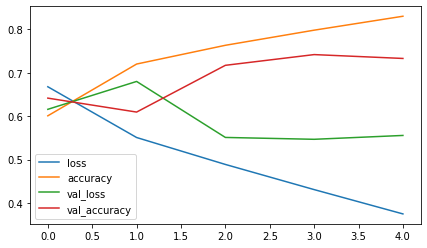

In [33]:
# Plot the training curves from pandas
import pandas as pd
pd.DataFrame(history_3.history).plot(figsize=(7, 4))

# Data Augmentation

Seems like even adding extra convolutional layers and increasing the number of neurons in our Dense layer didn't help us much.

Let's try Augmentaion then. Image augmentation simply refers to resizing and rescaling images. This can be zooming in or out, rotating, shifting or flipping our images randomly so there with the same amount of data we can provide our model more generalizable patterns. This technique usually leads to better model performances in image classification. ImageDataGenerator in tensorflow helps us augment our data very conveniently.

We will only augment our training images.

In [34]:
"""
    This will flip randomly rotate our images between 0 and 120 degrees, zoom
    them a little bit, shift them across their width and height and will also
    horizontally flip them randomly.
"""

train_datagen_augmented = ImageDataGenerator(rescale = 1/255,
                                          rotation_range=20,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [35]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 8005 images belonging to 2 classes.
Non-augmented training images:
Found 8005 images belonging to 2 classes.
Unchanged test images:
Found 2023 images belonging to 2 classes.


We will use the same test dataset.

In [36]:
len(train_data_augmented.next())

2

The datasets we created are two dimensional arrays, each dimension is a dataset of either cats or dogs images.

In [37]:
len(train_data.next()[0])

32

As we specified the batch size of 32 in our data generation so every dataset has 32 batches.

In [38]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

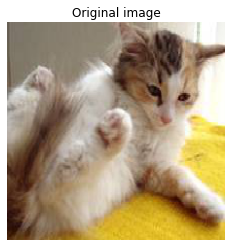

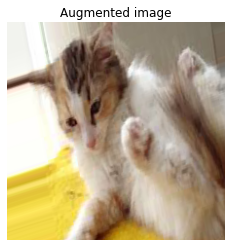

In [39]:
# Randomly show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

See, our images have been successfully augmented now we can try training our models on augmented data set and see if it improves our model performance.

# Model 4 : Augmented training dataset

In [40]:
# Create the model (same as model_3)
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(512, activation="relu"),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
251/251 [==============================] - 103s 409ms/step - loss: 0.7050 - accuracy: 0.4968 - val_loss: 0.6895 - val_accuracy: 0.5690
Epoch 2/10
251/251 [==============================] - 102s 408ms/step - loss: 0.6885 - accuracy: 0.5220 - val_loss: 0.6732 - val_accuracy: 0.6006
Epoch 3/10
251/251 [==============================] - 104s 414ms/step - loss: 0.6953 - accuracy: 0.5300 - val_loss: 0.6840 - val_accuracy: 0.6357
Epoch 4/10
251/251 [==============================] - 102s 408ms/step - loss: 0.6982 - accuracy: 0.5320 - val_loss: 0.6754 - val_accuracy: 0.5032
Epoch 5/10
251/251 [==============================] - 103s 412ms/step - loss: 0.6993 - accuracy: 0.5435 - val_loss: 0.6845 - val_accuracy: 0.5986
Epoch 6/10
251/251 [==============================] - 102s 407ms/step - loss: 0.6844 - accuracy: 0.5643 - val_loss: 0.7104 - val_accuracy: 0.5714
Epoch 7/10
251/251 [==============================] - 102s 406ms/step - loss: 0.6808 - accuracy: 0.5755 - val_loss: 0.6586 -

In [41]:
model_4.evaluate(test_data)

64/64 [==============================] - 6s 98ms/step - loss: 0.9923 - accuracy: 0.5230


[0.9922979474067688, 0.5229856371879578]

So our accuracy reduced. How about we shuffle our augmented dataset this time?

# Model 5 : Shuffle Augmented Dataset

In [42]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 8005 images belonging to 2 classes.


In [43]:
# Create the model (same as model_5 and model_6)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=0.5*len(test_data))

Epoch 1/10
251/251 [==============================] - 100s 397ms/step - loss: 0.6801 - accuracy: 0.5570 - val_loss: 0.6647 - val_accuracy: 0.5928
Epoch 2/10
251/251 [==============================] - 100s 398ms/step - loss: 0.6587 - accuracy: 0.5980 - val_loss: 0.6401 - val_accuracy: 0.6240
Epoch 3/10
251/251 [==============================] - 101s 403ms/step - loss: 0.6435 - accuracy: 0.6251 - val_loss: 0.6724 - val_accuracy: 0.6025
Epoch 4/10
251/251 [==============================] - 99s 396ms/step - loss: 0.6219 - accuracy: 0.6501 - val_loss: 0.6032 - val_accuracy: 0.6855
Epoch 5/10
251/251 [==============================] - 103s 411ms/step - loss: 0.6089 - accuracy: 0.6693 - val_loss: 0.6353 - val_accuracy: 0.6436
Epoch 6/10
251/251 [==============================] - 100s 397ms/step - loss: 0.6018 - accuracy: 0.6832 - val_loss: 0.5758 - val_accuracy: 0.7041
Epoch 7/10
251/251 [==============================] - 101s 402ms/step - loss: 0.5838 - accuracy: 0.6997 - val_loss: 0.5403 - 

In [44]:
model_5.evaluate(test_data)

64/64 [==============================] - 6s 97ms/step - loss: 0.5227 - accuracy: 0.7321


[0.522737979888916, 0.7320810556411743]

# Plotting Curves

In [45]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

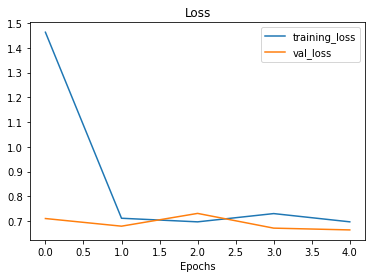

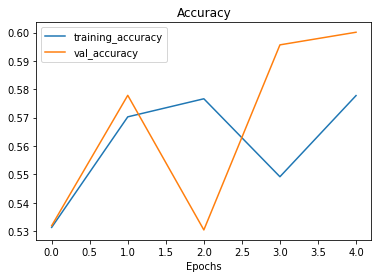

In [46]:
# Check out the loss curves of models
plot_loss_curves(history_1)

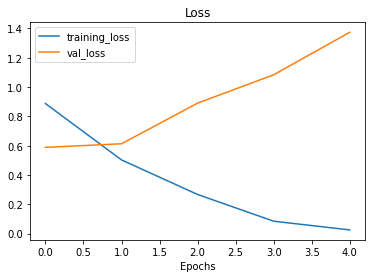

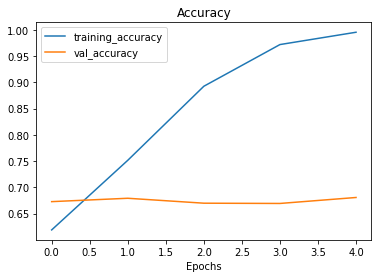

In [47]:
plot_loss_curves(history_2)

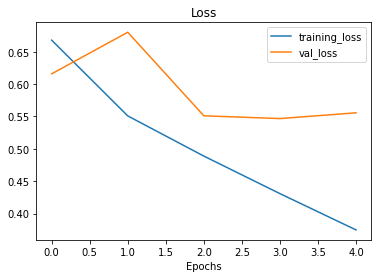

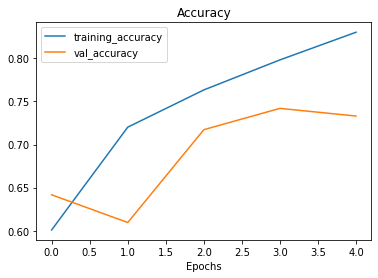

In [48]:
plot_loss_curves(history_3)

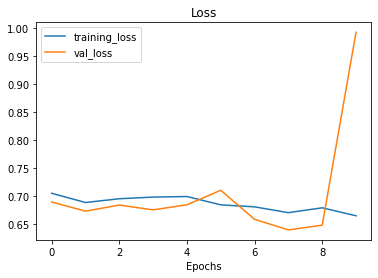

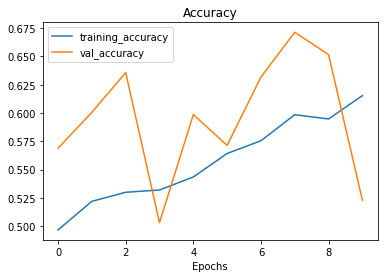

In [49]:
plot_loss_curves(history_4)

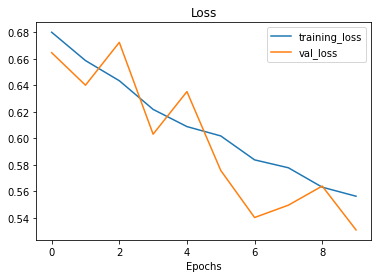

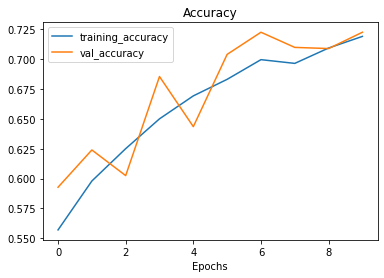

In [50]:
plot_loss_curves(history_5)

Our model 5 did great and achieved a 75% accuracy.

One last throw of the dice, how about we decrease our learning rate?

# Model 6 : Reduce learning rate.

In [51]:
# Create the model
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(512, activation="relu"),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=0.5*len(test_data))

Epoch 1/10
251/251 [==============================] - 100s 396ms/step - loss: 0.6632 - accuracy: 0.5971 - val_loss: 0.6234 - val_accuracy: 0.6621
Epoch 2/10
251/251 [==============================] - 101s 401ms/step - loss: 0.6292 - accuracy: 0.6495 - val_loss: 0.6007 - val_accuracy: 0.6855
Epoch 3/10
251/251 [==============================] - 99s 394ms/step - loss: 0.6131 - accuracy: 0.6667 - val_loss: 0.5971 - val_accuracy: 0.7031
Epoch 4/10
251/251 [==============================] - 99s 394ms/step - loss: 0.5911 - accuracy: 0.6903 - val_loss: 0.6182 - val_accuracy: 0.6650
Epoch 5/10
251/251 [==============================] - 101s 404ms/step - loss: 0.5806 - accuracy: 0.6934 - val_loss: 0.5610 - val_accuracy: 0.7227
Epoch 6/10
251/251 [==============================] - 99s 395ms/step - loss: 0.5651 - accuracy: 0.7111 - val_loss: 0.5346 - val_accuracy: 0.7539
Epoch 7/10
251/251 [==============================] - 100s 400ms/step - loss: 0.5489 - accuracy: 0.7191 - val_loss: 0.4971 - va

In [52]:
model_6.evaluate(test_data)

64/64 [==============================] - 6s 97ms/step - loss: 0.4842 - accuracy: 0.7736


[0.4841764271259308, 0.7736035585403442]

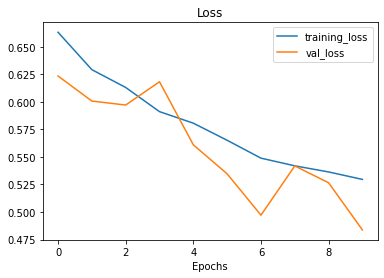

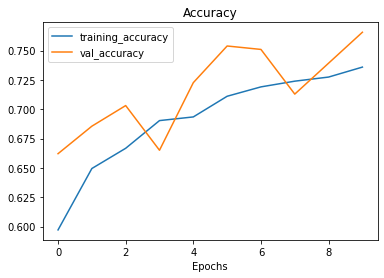

In [53]:
plot_loss_curves(history_6)

So our model 6 performed the best.

Let's make predictions with it.

# Predictions

In [54]:
# View our example image
!wget https://raw.githubusercontent.com/maxogden/cats/master/cat_photos/00092f6ec7a911e1be6a12313820455d_7.png 

--2022-06-07 20:19:59--  https://raw.githubusercontent.com/maxogden/cats/master/cat_photos/00092f6ec7a911e1be6a12313820455d_7.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 713133 (696K) [image/png]
Saving to: ‘00092f6ec7a911e1be6a12313820455d_7.png’

00092f6ec7a911e1be6 100%[===================>] 696.42K  --.-KB/s    in 0.05s   

2022-06-07 20:19:59 (15.0 MB/s) - ‘00092f6ec7a911e1be6a12313820455d_7.png’ saved [713133/713133]



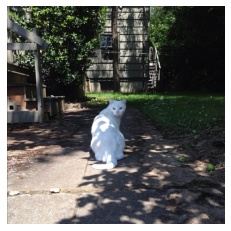

In [55]:
cat = mpimg.imread("00092f6ec7a911e1be6a12313820455d_7.png")
plt.imshow(cat)
plt.axis(False);

In [56]:
cat.shape

(612, 612, 3)

In [57]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [58]:
# Load in and preprocess our custom image
cat = load_and_prep_image("00092f6ec7a911e1be6a12313820455d_7.png")
cat

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.41092595, 0.4147772 , 0.39243886],
        [0.4210756 , 0.44379973, 0.37793836],
        [0.20943654, 0.24343511, 0.18454157],
        ...,
        [0.04201536, 0.04201536, 0.03417223],
        [0.04408455, 0.04723588, 0.04096841],
        [0.04548337, 0.0533265 , 0.04940493]],

       [[0.47618955, 0.48340434, 0.43385762],
        [0.44173387, 0.46070865, 0.3841765 ],
        [0.2635662 , 0.28841677, 0.23994115],
        ...,
        [0.07079805, 0.07079805, 0.06295491],
        [0.05501814, 0.05816947, 0.05001683],
        [0.05434274, 0.06218588, 0.05357243]],

       [[0.5602335 , 0.55921346, 0.4981155 ],
        [0.49555537, 0.5055041 , 0.44272396],
        [0.32802293, 0.3384921 , 0.3109711 ],
        ...,
        [0.06885294, 0.06885294, 0.0610098 ],
        [0.0546637 , 0.05781503, 0.04839623],
        [0.03921569, 0.04705882, 0.03529412]],

       ...,

       [[0.74532104, 0.69434065, 0.6629681 ],
        [0.84

In [59]:
cat.shape

TensorShape([224, 224, 3])

There's one more problem...

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of (batch_size, 224, 224, 3).

We can fix this by adding an extra to our custom image tensor using tf.expand_dims.

In [60]:
# Add an extra axis
print(f"Shape before new dimension: {cat.shape}")
cat = tf.expand_dims(cat, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {cat.shape}")
cat

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.41092595, 0.4147772 , 0.39243886],
         [0.4210756 , 0.44379973, 0.37793836],
         [0.20943654, 0.24343511, 0.18454157],
         ...,
         [0.04201536, 0.04201536, 0.03417223],
         [0.04408455, 0.04723588, 0.04096841],
         [0.04548337, 0.0533265 , 0.04940493]],

        [[0.47618955, 0.48340434, 0.43385762],
         [0.44173387, 0.46070865, 0.3841765 ],
         [0.2635662 , 0.28841677, 0.23994115],
         ...,
         [0.07079805, 0.07079805, 0.06295491],
         [0.05501814, 0.05816947, 0.05001683],
         [0.05434274, 0.06218588, 0.05357243]],

        [[0.5602335 , 0.55921346, 0.4981155 ],
         [0.49555537, 0.5055041 , 0.44272396],
         [0.32802293, 0.3384921 , 0.3109711 ],
         ...,
         [0.06885294, 0.06885294, 0.0610098 ],
         [0.0546637 , 0.05781503, 0.04839623],
         [0.03921569, 0.04705882, 0.03529412]],

        ...,

        [[0.74532104, 0.69434065, 

In [61]:
cat.shape

TensorShape([1, 224, 224, 3])

In [69]:
class_names

['cats', 'dogs']

In [67]:
# Make a prediction on custom image tensor
pred = model_6.predict(cat)
pred

array([[0.76511014]], dtype=float32)

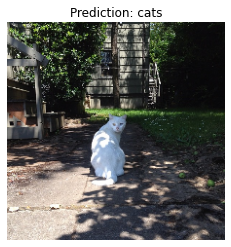

In [75]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.argmax(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
# Test our model on a custom image
pred_and_plot(model_6, "00092f6ec7a911e1be6a12313820455d_7.png", class_names)

In [82]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/maxogden/cats/master/cat_photos/kublai50.jpg

--2022-06-07 20:34:08--  https://raw.githubusercontent.com/maxogden/cats/master/cat_photos/kublai50.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22814 (22K) [image/jpeg]
Saving to: ‘kublai50.jpg’

kublai50.jpg        100%[===================>]  22.28K  --.-KB/s    in 0.001s  

2022-06-07 20:34:08 (15.1 MB/s) - ‘kublai50.jpg’ saved [22814/22814]



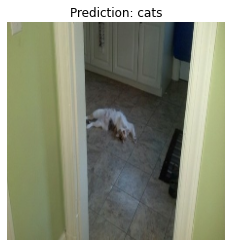

In [83]:
pred_and_plot(model_6, "kublai50.jpg", class_names)

In [84]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/maxogden/cats/master/cat_photos/bd9c8d0ea75711e1989612313815112c_7.png

--2022-06-07 20:34:47--  https://raw.githubusercontent.com/maxogden/cats/master/cat_photos/bd9c8d0ea75711e1989612313815112c_7.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 549986 (537K) [image/png]
Saving to: ‘bd9c8d0ea75711e1989612313815112c_7.png’

bd9c8d0ea75711e1989 100%[===================>] 537.10K  --.-KB/s    in 0.05s   

2022-06-07 20:34:47 (10.7 MB/s) - ‘bd9c8d0ea75711e1989612313815112c_7.png’ saved [549986/549986]



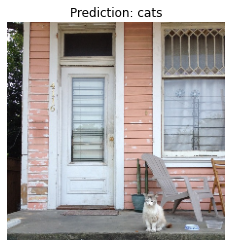

In [85]:
pred_and_plot(model_6, "bd9c8d0ea75711e1989612313815112c_7.png", class_names)

In [91]:
# Download another test image and make a prediction on it
!wget https://github.com/jigsawpieces/dog-api-images/blob/master/bulldog-boston/n02096585_10452.jpg?raw=true

--2022-06-07 20:42:56--  https://github.com/jigsawpieces/dog-api-images/blob/master/bulldog-boston/n02096585_10452.jpg?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jigsawpieces/dog-api-images/raw/master/bulldog-boston/n02096585_10452.jpg [following]
--2022-06-07 20:42:56--  https://github.com/jigsawpieces/dog-api-images/raw/master/bulldog-boston/n02096585_10452.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jigsawpieces/dog-api-images/master/bulldog-boston/n02096585_10452.jpg [following]
--2022-06-07 20:42:56--  https://raw.githubusercontent.com/jigsawpieces/dog-api-images/master/bulldog-boston/n02096585_10452.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133,

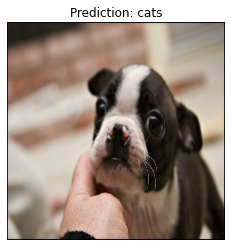

In [92]:
pred_and_plot(model_6, "n02096585_10452.jpg?raw=true", class_names)

In [99]:
!wget https://github.com/jigsawpieces/dog-api-images/blob/master/setter-english/n02100735_10086.jpg?raw=true

--2022-06-07 20:46:50--  https://github.com/jigsawpieces/dog-api-images/blob/master/setter-english/n02100735_10086.jpg?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jigsawpieces/dog-api-images/raw/master/setter-english/n02100735_10086.jpg [following]
--2022-06-07 20:46:50--  https://github.com/jigsawpieces/dog-api-images/raw/master/setter-english/n02100735_10086.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jigsawpieces/dog-api-images/master/setter-english/n02100735_10086.jpg [following]
--2022-06-07 20:46:50--  https://raw.githubusercontent.com/jigsawpieces/dog-api-images/master/setter-english/n02100735_10086.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133,

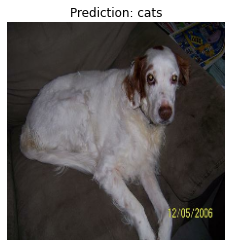

In [100]:
pred_and_plot(model_6, 'n02100735_10086.jpg?raw=true', class_names)